In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [2]:
#Create two arrays of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#zipping them
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list from the zipped tuple in API_practice notebook
coordinates = list(lat_lngs)

In [4]:
#Create a list for holding the cities.
cities = []
#Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
   city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

   # If the city is unique, then we will add it to the cities list.
   if city not in cities:
       cities.append(city)
#Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# build the basic URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
#print(url)

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
# Instead of using two for loops, we can use the enumerate() method as an alternative way to iterate through the list of cities 
# and retrieve both the index, and the city from the list.
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    #   we are removing the blank spaces in 
    #   the city name and concatenating the city name with '+'
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        #city_desc = city_weather["weather"]["description"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list with a dictionary for that city.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          #"Weather Description":city_desc,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except Exception as ex:
        print(ex)
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | qaanaaq
Processing Record 2 of Set 1 | henties bay
Processing Record 3 of Set 1 | taolanaro
'coord'
City not found. Skipping...
Processing Record 4 of Set 1 | mataura
Processing Record 5 of Set 1 | hobart
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | iqaluit
Processing Record 8 of Set 1 | tasiilaq
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | guiratinga
Processing Record 12 of Set 1 | warqla
'coord'
City not found. Skipping...
Processing Record 13 of Set 1 | butaritari
Processing Record 14 of Set 1 | new norfolk
Processing Record 15 of Set 1 | sorong
Processing Record 16 of Set 1 | airai
Processing Record 17 of Set 1 | nagato
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | kununurra
Processing Record 20 of Set 1 | barrow
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | bredasdorp
Processing Record 23 of Set 1 | vaini
Pr

Processing Record 37 of Set 4 | samusu
'coord'
City not found. Skipping...
Processing Record 38 of Set 4 | harlev
Processing Record 39 of Set 4 | vila franca do campo
Processing Record 40 of Set 4 | norman wells
Processing Record 41 of Set 4 | boden
Processing Record 42 of Set 4 | eureka
Processing Record 43 of Set 4 | segovia
Processing Record 44 of Set 4 | valleyview
Processing Record 45 of Set 4 | quatre cocos
Processing Record 46 of Set 4 | guymon
Processing Record 47 of Set 4 | vesele
Processing Record 48 of Set 4 | sabha
Processing Record 49 of Set 4 | chulman
Processing Record 50 of Set 4 | buncrana
Processing Record 1 of Set 5 | gracias
Processing Record 2 of Set 5 | ahipara
Processing Record 3 of Set 5 | san jeronimo
Processing Record 4 of Set 5 | tuatapere
Processing Record 5 of Set 5 | grand river south east
'coord'
City not found. Skipping...
Processing Record 6 of Set 5 | port hardy
Processing Record 7 of Set 5 | tambovka
Processing Record 8 of Set 5 | mutis
Processing Rec

Processing Record 21 of Set 8 | homer
Processing Record 22 of Set 8 | kaitangata
Processing Record 23 of Set 8 | ayan
Processing Record 24 of Set 8 | marzuq
Processing Record 25 of Set 8 | attawapiskat
'coord'
City not found. Skipping...
Processing Record 26 of Set 8 | sinnamary
Processing Record 27 of Set 8 | hazorasp
Processing Record 28 of Set 8 | buariki
'coord'
City not found. Skipping...
Processing Record 29 of Set 8 | nemuro
Processing Record 30 of Set 8 | torbay
Processing Record 31 of Set 8 | severo-kurilsk
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | luderitz
Processing Record 34 of Set 8 | orje
Processing Record 35 of Set 8 | makakilo city
Processing Record 36 of Set 8 | cape elizabeth
'coord'
City not found. Skipping...
Processing Record 37 of Set 8 | tamale
Processing Record 38 of Set 8 | lipari
Processing Record 39 of Set 8 | pontianak
Processing Record 40 of Set 8 | awjilah
Processing Record 41 of Set 8 | campbell river
Processing Record 42 of

'coord'
City not found. Skipping...
Processing Record 6 of Set 12 | guozhen
Processing Record 7 of Set 12 | chern
Processing Record 8 of Set 12 | asyut
Processing Record 9 of Set 12 | ancud
Processing Record 10 of Set 12 | buraydah
Processing Record 11 of Set 12 | ukiah
Processing Record 12 of Set 12 | illapel
Processing Record 13 of Set 12 | changping
Processing Record 14 of Set 12 | kavieng
Processing Record 15 of Set 12 | portland
Processing Record 16 of Set 12 | kargasok
Processing Record 17 of Set 12 | karkaralinsk
'coord'
City not found. Skipping...
Processing Record 18 of Set 12 | hobyo
Processing Record 19 of Set 12 | boa vista
Processing Record 20 of Set 12 | marshall
Processing Record 21 of Set 12 | nguruka
Processing Record 22 of Set 12 | la cruz
Processing Record 23 of Set 12 | binabalian
Processing Record 24 of Set 12 | fairbanks
Processing Record 25 of Set 12 | marcona
'coord'
City not found. Skipping...
Processing Record 26 of Set 12 | solton
Processing Record 27 of Set 

In [8]:
len(city_data)

558

In [9]:
# convert the list of dictionaries to a DataFrame
# confirm they are in the correct order
# export the DataFrame as a csv file
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fortuna,40.60,-124.16,50.00,75,75,12.75,US,2020-11-08 18:48:03
1,Ahipara,-35.17,173.17,57.11,82,1,12.10,NZ,2020-11-08 18:52:45
2,Rikitea,-23.12,-134.97,72.41,77,83,16.58,PF,2020-11-08 18:52:45
3,The Pas,53.83,-101.25,19.40,79,90,13.87,CA,2020-11-08 18:52:46
4,Grindavik,63.84,-22.43,41.00,86,75,23.04,IS,2020-11-08 18:52:46
5,Jalu,29.03,21.55,71.10,50,99,8.61,LY,2020-11-08 18:52:46
6,Bredasdorp,-34.53,20.04,55.40,87,3,10.29,ZA,2020-11-08 18:52:46
7,Kapaa,22.08,-159.32,78.80,78,20,16.11,US,2020-11-08 18:49:11
8,Male,4.17,73.51,78.80,94,75,10.29,MV,2020-11-08 18:52:46
9,Mount Gambier,-37.83,140.77,48.20,93,84,5.82,AU,2020-11-08 18:52:46


In [10]:
# to order the Dataframe correctly
# first create a variable to hold an array with the columns in the correct order
# then we assign the DataFrame (or a new one) with the array
new_column_order = ['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fortuna,US,2020-11-08 18:48:03,40.60,-124.16,50.00,75,75,12.75
1,Ahipara,NZ,2020-11-08 18:52:45,-35.17,173.17,57.11,82,1,12.10
2,Rikitea,PF,2020-11-08 18:52:45,-23.12,-134.97,72.41,77,83,16.58
3,The Pas,CA,2020-11-08 18:52:46,53.83,-101.25,19.40,79,90,13.87
4,Grindavik,IS,2020-11-08 18:52:46,63.84,-22.43,41.00,86,75,23.04
5,Jalu,LY,2020-11-08 18:52:46,29.03,21.55,71.10,50,99,8.61
6,Bredasdorp,ZA,2020-11-08 18:52:46,-34.53,20.04,55.40,87,3,10.29
7,Kapaa,US,2020-11-08 18:49:11,22.08,-159.32,78.80,78,20,16.11
8,Male,MV,2020-11-08 18:52:46,4.17,73.51,78.80,94,75,10.29
9,Mount Gambier,AU,2020-11-08 18:52:46,-37.83,140.77,48.20,93,84,5.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
# If we ever need to export the CSV file to a DataFrame, column A "City_ID" will be present in the DataFrame

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'11/08/20'

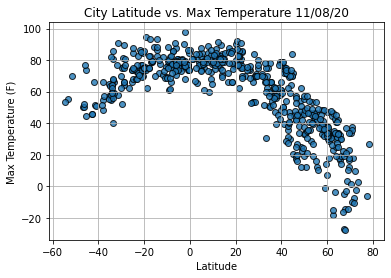

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

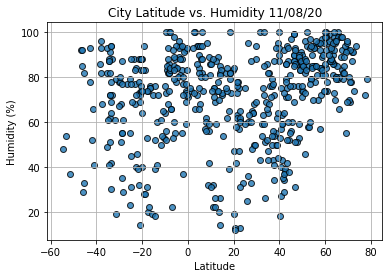

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

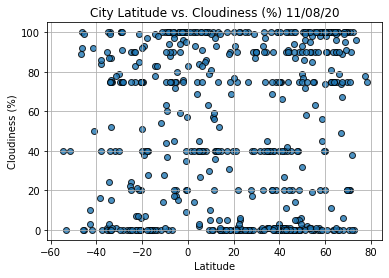

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

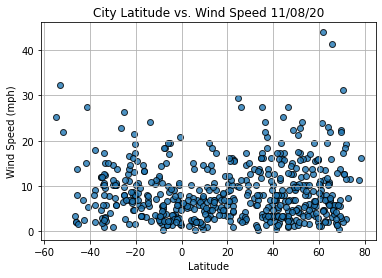

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f" r value is: {r_value:.2f}")

In [19]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

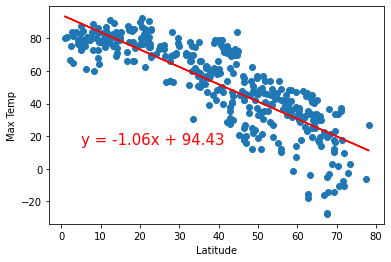

 r value is: -0.84


In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,15))

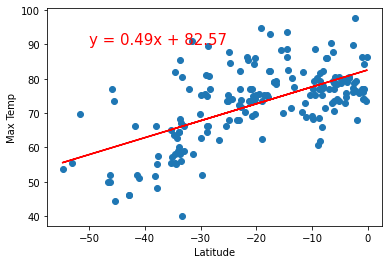

 r value is: 0.61


In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

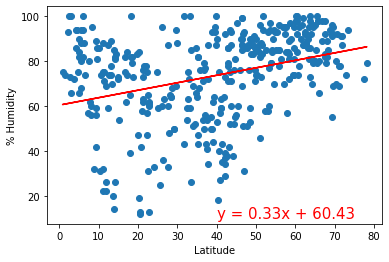

 r value is: 0.33


In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

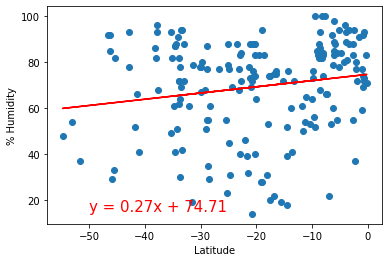

 r value is: 0.17


In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

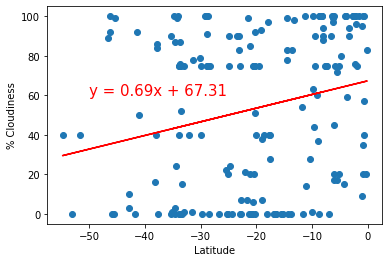

 r value is: 0.24


In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

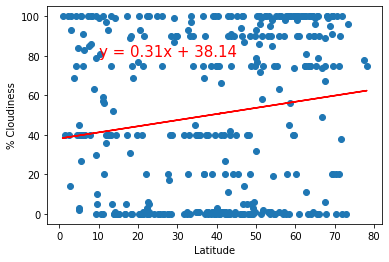

 r value is: 0.15


In [31]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,80))

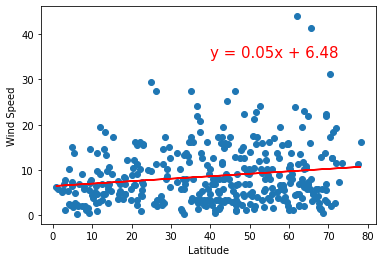

 r value is: 0.17


In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

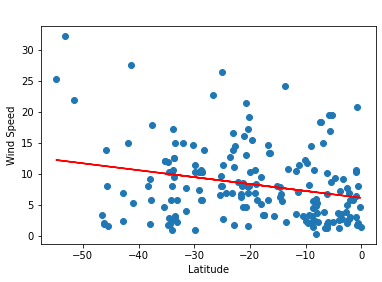

 r value is: -0.25


In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))